# Communicating Results

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import pandas as pd

playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

(10841, 13)


In [30]:
playstore = playstore.drop(10472)
print(playstore.shape)

(10840, 13)


In [31]:
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size

In [32]:
playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")
paid = playstore[playstore["Price"] != 0].copy()
paid = paid.drop('Type',axis=1)

In [33]:
paid['Reviews'] = pd.to_numeric(paid['Reviews'])
paid['Size'] = paid['Size'].apply(clean_size)
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null int64
Size              724 non-null float64
Installs          800 non-null object
Price             800 non-null float64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null object
Current Ver       798 non-null object
Android Ver       799 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 81.2+ KB


In [34]:
print(
    "Number of rows before dropping duplicates: {}".format(paid.shape[0])
)
paid.drop_duplicates(inplace=True)
print(
    "Number of rows after dropping duplicates: {}".format(paid.shape[0])
)

Number of rows before dropping duplicates: 800
Number of rows after dropping duplicates: 765


In [35]:
app_mask = paid["App"].isin(
    ["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"]
)

category_mask = paid["Category"] == "FAMILY"

paid[app_mask & category_mask]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up


In [36]:
paid.drop([2151, 4301], inplace=True)
print(paid.duplicated(subset="App").sum())

7


In [37]:
paid = paid.sort_values('Reviews',ascending=False)

paid.drop_duplicates('App',inplace=True)

print(paid.duplicated("App").sum())

paid.reset_index(inplace=True, drop=True)

0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008221A58>]],
      dtype=object)

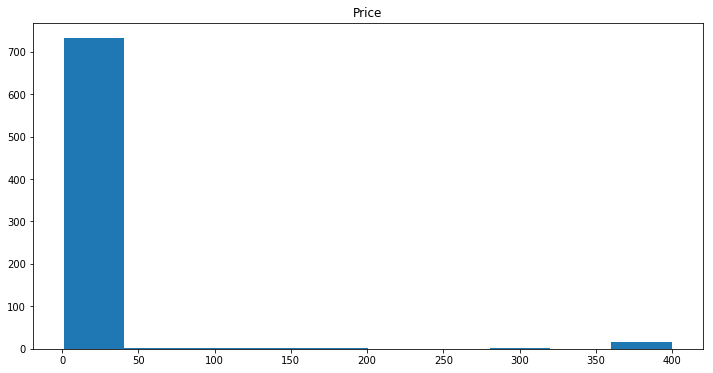

In [38]:
paid.hist(column="Price", grid=False, figsize=(12,6))

In [39]:
paid.sort_values(by="Price", ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
277,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
355,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
371,I am Rich!,FINANCE,3.8,93,22.0,"1,000+",399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.7,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008229EB8>]],
      dtype=object)

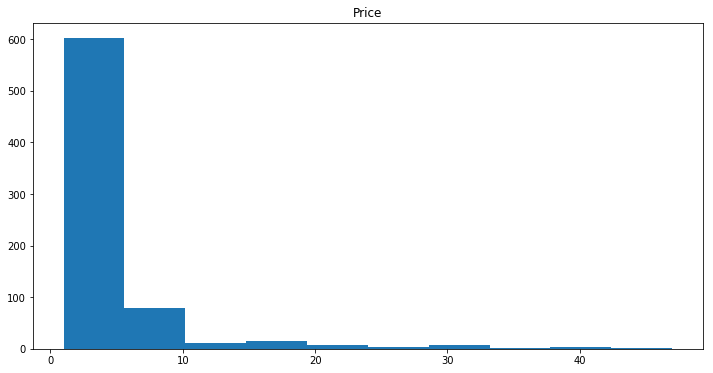

In [40]:
affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(12,6))

In [41]:
cheap = affordable_apps["Price"]<5
reasonable = affordable_apps["Price"]>=5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000821DE10>]],
      dtype=object)

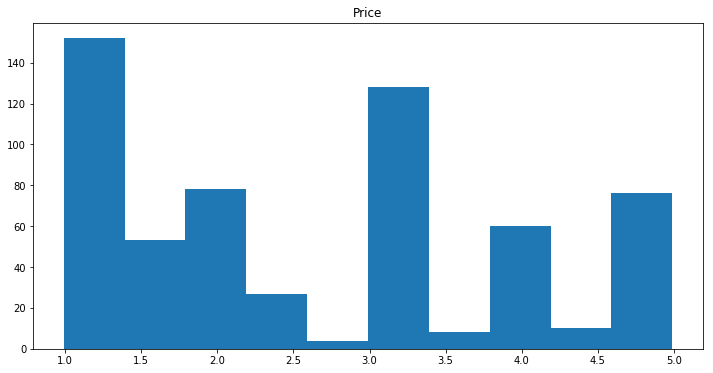

In [42]:
affordable_apps[cheap].hist(column="Price", grid=False, figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000081F0240>]],
      dtype=object)

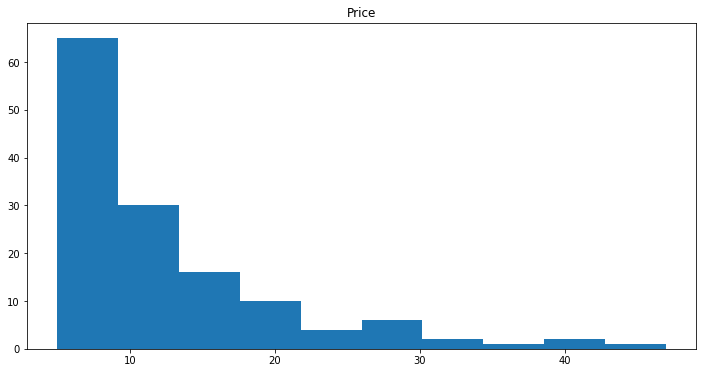

In [43]:
affordable_apps[reasonable].hist(column="Price", grid=False, figsize=(12,6))

In [44]:
affordable_apps['affordability'] = affordable_apps['Price'].apply(lambda price: "cheap" if price<5 else "reasonable")

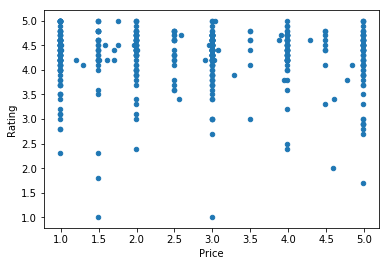

In [45]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

In [46]:
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

-0.05593771505463038


In [47]:
cheap_mean = affordable_apps[cheap]['Price'].mean()

In [48]:
affordable_apps.loc[cheap, "price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < cheap_mean else 0
)

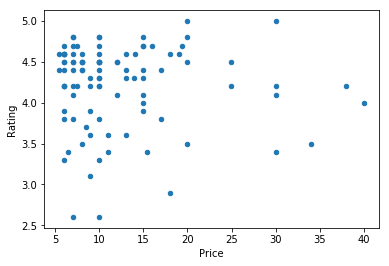

In [49]:
affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

In [50]:
reasonable_mean = affordable_apps.loc[reasonable, "Price"].mean()

affordable_apps.loc[reasonable,"price_criterion"]=affordable_apps["Price"].apply(lambda price: 1 if price<reasonable_mean else 0)

In [51]:
print(affordable_apps["Genres"].unique())

['Arcade;Action & Adventure' 'Action' 'Strategy' 'Puzzle;Brain Games'
 'Card;Action & Adventure' 'Sports' 'Personalization' 'Arcade' 'Puzzle'
 'Productivity' 'Weather' 'Tools' 'Sports;Action & Adventure'
 'Communication' 'Role Playing' 'Photography' 'Card'
 'Simulation;Education' 'Adventure' 'Education;Pretend Play' 'Lifestyle'
 'Strategy;Action & Adventure' 'Board' 'Finance' 'Health & Fitness'
 'Role Playing;Action & Adventure' 'Music' 'Travel & Local' 'Business'
 'Simulation' 'Adventure;Action & Adventure' 'Parenting'
 'Adventure;Brain Games' 'Entertainment' 'Maps & Navigation'
 'Video Players & Editors' 'Racing' 'Medical' 'Auto & Vehicles'
 'Educational;Pretend Play' 'Casual;Pretend Play' 'Education;Creativity'
 'Education' 'Board;Brain Games' 'Food & Drink'
 'Action;Action & Adventure' 'Simulation;Pretend Play' 'Dating'
 'Books & Reference' 'Art & Design' 'Racing;Action & Adventure' 'Casual'
 'Education;Education' 'Educational;Education' 'Casual;Education'
 'Shopping' 'Books & Refe

In [52]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

In [53]:
genres_mean = affordable_apps.groupby(
    ["affordability", "genre_count"]
).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

In [54]:
def label_genres(row):
    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

In [55]:
affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns"
)

In [56]:
categories_mean = affordable_apps.groupby(
    ["affordability", "Category"]
).mean()[["Price"]]

In [58]:
def label_categories(row):
    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

In [59]:
affordable_apps["category_criterion"] = affordable_apps.apply(
    label_categories, axis="columns"
)

In [60]:
def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)

In [61]:
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")

affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)

affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

total_impact = affordable_apps["Impact"].sum()
print(total_impact)

115441618.98
